# Explicit Runge-Kutta Methods Exercises

`````{admonition} Exercise 2.1
:class: note
:name: ex2.1

Write the following Runge-Kutta method in a Butcher tableau.
\begin{align*}
    y_{n+1} &=y_n +\frac{h}{6}(k_1 +4k_3 +k_4 ),\\
    k_1 &=f(t_n ,y_n ),\\
    k_2 &=f(t_n +\tfrac{1}{4}h,y_n +\tfrac{1}{4}hk_1 ),\\
    k_3 &=f(t_n +\tfrac{1}{2}h,y_n +\tfrac{1}{2}hk_2 ),\\
    k_4 &=f(t_n +h,y_n +h(k_1 -2k_2 +2k_3 )).
\end{align*}

````{dropdown} Solution

\begin{align*}
    \begin{array}{c|cccc}
        0 & 0 \\
        \frac{1}{4} & \frac{1}{4} \\
        \frac{1}{2} & 0 & \frac{1}{2} \\
        1 & 1 & -2 & 2 \\ \hline
        & \frac{1}{6} & 0 & \frac{2}{3} & \frac{1}{6}
    \end{array}
\end{align*}
````
`````

`````{admonition} Exercise 2.2
:class: note
:name: ex2.2

Write out the equations for the following Runge-Kutta method.
\begin{align*}\begin{array}{c|cccc}
    0 &  &  &  & \\
    \frac{1}{4} & \frac{1}{4} &  &  & \\
    \frac{1}{2} & -\frac{1}{2} & 1 &  & \\
    1 & \frac{1}{4} & 0 & \frac{3}{4} & \\ \hline
    & 0 & \frac{4}{9} & \frac{1}{3} & \frac{2}{9}
\end{array}\end{align*}

````{dropdown} Solution

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{9}(4k_2 + 3k_3 + 2k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{4}h, y_n + \tfrac{1}{4} h k_1), \\
    k_3 &= f(t_n + \tfrac{1}{2}h, y_n + h ( - \tfrac{1}{2}k_1 + k_2)), \\
    k_4 &= f(t_n + h, y_n + h ( \tfrac{1}{4}k_1 + \tfrac{3}{4}k_3)).
\end{align*}
````
`````

`````{admonition} Exercise 2.3
:class: note
:name: ex2.3

Using pen and paper, derive an explicit second-order Runge-Kutta method where $b_1 =\frac{1}{3}$.

````{dropdown} Solution
The order conditions are:
\begin{align*}
    \frac{1}{3} + b_2 &=1,\\
    c_2 b_2 &=\frac{1}{2},\\
    a_{21} b_2 &=\frac{1}{2}
\end{align*}

Solving gives $b_2 = \frac{2}{3}$, $c_2=\frac{3}{4}$ and $a_{21} = \frac{3}{4}$ so the method is

\begin{align*}
    y_{n+1} &= y_n + \frac{h}{3}(k_1 + 2k_2), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{3}{4}h, y_n + \tfrac{3}{4}h k_1).
\end{align*}

Alternatively as a Butcher tableau
\begin{align*}
    \begin{array}{c|cc}
    0 & 0 \\
    \frac{3}{4} & \frac{3}{4} & 0 \\ \hline
    & \frac{1}{3} & \frac{2}{3}
    \end{array}
\end{align*}
````
`````

`````{admonition} Exercise 2.4
:class: note
:name: ex2.4

Repeat [exercise 2.3](ex2.3) using Python or MATLAB to solve the order conditions.

````{dropdown} Solution

Python 
```python
from sympy import *
init_printing()

# Declare symbolic variables
a21, b1, b2, c2 = symbols('a21, b1, b2, c2')
b1 = Rational(1,3)

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b2 * c2 - Rational(1,2)
eq3 = a21 * b2 - Rational(1,2)

# Solve order conditions
solve((eq1, eq2, eq3))
```

MATLAB

```
% Declare symbolic variables
syms a21 b1 b2 c2
b1 = 1 / 3;

% Define order conditions
eq1 = b1 + b2 == 1;
eq2 = b2 * c2 == 1 / 2;
eq3 = a21 * b2 == 1 / 2;

% Solve order conditions
solve(eq1, eq2, eq3)
```

Output:

```{glue:math} ex2.4
:label: ex2.4-glue
```

````
`````

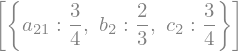

In [1]:
from sympy import *
from myst_nb import glue
init_printing()

# Declare symbolic variables
a21, b1, b2, c2 = symbols('a21, b1, b2, c2')
b1 = Rational(1,3)

# Define order conditions
eq1 = b1 + b2 - 1
eq2 = b2 * c2 - Rational(1,2)
eq3 = a21 * b2 - Rational(1,2)

# Solve order conditions
sol = solve((eq1, eq2, eq3))
glue("ex2.4", sol)

`````{admonition} Exercise 2.5
:class: note
:name: ex2.5

Derive an explicit fourth-order Runge-Kutta method where $b_1 = 0$ and $c_2 =\frac{1}{5}$.

````{dropdown} Solution

Python

```python
from sympy import *
init_printing()

# Declare symbolic variables
a21, a31, a32, a41, a42, a43 = symbols('a21, a31, a32, a41, a42, a43')
b1, b2, b3, b4 = symbols('b1, b2, b3, b4')
c2, c3, c4 = symbols('c2, c3, c4')

# Choose values for the unkowns
b1, c2 = 0, Rational(1,5)

# Define order conditions
eq1 = b1 + b2 + b3 + b4 - 1
eq2 = b2 * c2 + b3 * c3 + b4 * c4 - Rational(1,2)
eq3 = b2 * c2 ** 2 + b3 * c3 ** 2 + b4 * c4 ** 2 - Rational(1,3)
eq4 = b2 * c2 ** 3 + b3 * c3 ** 3 + b4 * c4 ** 4 - Rational(1,4)
eq5 = b3 * c3 * a32 * c2 + b4 * c4 * (a42 * c2 + a43 * c3) - Rational(1,8)
eq6 = b3 * a32 + b4 * a42 - b2 * (1 - c2)
eq7 = b4 * a43 - b3 * (1 - c3)
eq8 = b4 * (1 - c4)
eq9 = c2 - a21
eq10 = c3 - a31 - a32
eq11 = c4 - a41- a42 - a43

# Solve order conditions
solve((eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11))
```

MATLAB

```
% Declare symbolic variables
syms a21 a31 a32 a41 a42 a43 b1 b2 b3 b4 c2 c3 c4

% Choose values for the unknowns
b1 = 0;
c2 = 1 / 5;

% Define order conditions
eq1 = b1 + b2 + b3 + b4 == 1;
eq2 = b2 * c2 + b3 * c3 + b4 * c4 == 1 / 2;
eq3 = b2 * c2 ^ 2 + b3 * c3 ^ 2 + b4 * c4 ^ 2 == 1 / 3;
eq4 = b2 * c2 ^ 3 + b3 * c3 ^ 3 + b4 * c4 ^ 3 == 1 / 4;
eq5 = b3 * c3 * a32 * c2 + b4 * c4 * (a42 * c2 + a43 * c3) == 1 / 8;
eq6 = b3 * a32 + b4 * a42 == b2 * (1 - c2);
eq7 = b4 * a43 == b3 * (1 - c3);
eq8 = b4 * (1 - c4) == 0;
eq9 = c2 == a21;
eq10 = c3 == a31 + a32;
eq11 = c4 - a41 - a42 - a43;

% Solve order conditions
solve(eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11)
```

Output:

```{glue:math} ex2.5
:label: ex2.5-glue
```

So the method is

\begin{align*}
    y_{n+1} &= y_n + h(\tfrac{125}{264} k_2 + \tfrac{16}{33} k_3 + \tfrac{1}{24} k_4), \\
    k_1 &= f(t_n, y_n), \\
    k_2 &= f(t_n + \tfrac{1}{5}h, y_n + \tfrac{1}{5}h k_1), \\
    k_3 &= f(t_n + \tfrac{3}{4}h, y_n + h(-\tfrac{31}{32} k_1 + \tfrac{55}{32} k_2)), \\
    k_4 &= f(t_n + h, y_n + h(9 k_1 - \tfrac{120}{11} k_2 + \tfrac{32}{11} k_3)).
\end{align*}

Alternatively as a Butcher tableau

\begin{align*}
    \begin{array}{c|cccc}
    0 & 0 \\
    \frac{1}{5} & \frac{1}{5} \\
    \frac{3}{4} & -\frac{31}{32} & \frac{55}{32} \\
    1 & 9 & -\frac{120}{11} & \frac{32}{11} \\
    \hline
    & 0 & \frac{125}{264} & \frac{16}{33} & \frac{1}{24}
    \end{array}
\end{align*}

````
`````

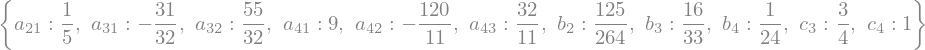

In [2]:
from sympy import *
from myst_nb import glue
init_printing()

# Declare symbolic variables
a21, a31, a32, a41, a42, a43 = symbols('a21, a31, a32, a41, a42, a43')
b1, b2, b3, b4 = symbols('b1, b2, b3, b4')
c2, c3, c4 = symbols('c2, c3, c4')

# Choose values for the unkowns
b1, c2 = 0, Rational(1,5)

# Define order conditions
eq1 = b1 + b2 + b3 + b4 - 1
eq2 = b2 * c2 + b3 * c3 + b4 * c4 - Rational(1,2)
eq3 = b2 * c2 ** 2 + b3 * c3 ** 2 + b4 * c4 ** 2 - Rational(1,3)
eq4 = b2 * c2 ** 3 + b3 * c3 ** 3 + b4 * c4 ** 4 - Rational(1,4)
eq5 = b3 * c3 * a32 * c2 + b4 * c4 * (a42 * c2 + a43 * c3) - Rational(1,8)
eq6 = b3 * a32 + b4 * a42 - b2 * (1 - c2)
eq7 = b4 * a43 - b3 * (1 - c3)
eq8 = b4 * (1 - c4)
eq9 = c2 - a21
eq10 = c3 - a31 - a32
eq11 = c4 - a41- a42 - a43

# Solve order conditions
sol =  solve((eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8, eq9, eq10, eq11))
glue("ex2.5", sol)

`````{admonition} Exercise 2.6
:class: note
:name: ex2.6

Using pen and paper, apply your Runge-Kutta method derived in [exercise 2.3](ex2.3) to solve the following initial value problem using a step length of $h=0.4$

\begin{align*}
    y' =t-y, \qquad t\in [0,2],\qquad y(0)=1
\end{align*}

Write your solutions correct to 4 decimal places.

````{dropdown} Solution

\begin{align*}
    k_1 &= f(t_0, y_0) = (0) - (1) = -1, \\
    k_2 &= f(t_0 + \tfrac{3}{4} h, y_0 + \tfrac{3}{4} hk_1) \\
    &= (0.0 + \tfrac{3}{4}(0.4)) - (1 + \tfrac{3}{4}(0.4)(-1)) \\
    &= -0.4, \\
    y_1 &= y_0 + \frac{h}{3}(k_1 + 2 k_2) \\
    &= 1 + \frac{0.4}{3}(-1 + 2(-0.4)) \\
    &= 0.76, \\
    \\
    k_1 &= f(t_1, y_1) = (0.4) - (0.76) = -0.36, \\
    k_2 &= f(t_1 + \tfrac{3}{4} h, y_1 + \tfrac{3}{4} hk_1) \\
    &= (0.4 + \tfrac{3}{4}(0.4)) - (0.76 + \tfrac{3}{4}(0.4)(-0.36)) \\
    &= 0.0480, \\
    y_2 &= y_1 + \frac{h}{3}(k_1 + 2 k_2) \\
    &= 0.76 + \frac{0.4}{3}(-0.36 + 2(0.0480)) \\
    &= 0.7248, \\
    \\
    k_1 &= f(t_2, y_2) = (0.8) - (0.7248) = 0.0752, \\
    k_2 &= f(t_2 + \tfrac{3}{4} h, y_2 + \tfrac{3}{4} hk_1) \\
    &= (0.8 + \tfrac{3}{4}(0.4)) - (0.7248 + \tfrac{3}{4}(0.4)(0.0752)) \\
    &= 0.3526, \\
    y_3 &= y_2 + \frac{h}{3}(k_1 + 2 k_2) \\
    &= 0.7248 + \frac{0.4}{3}(0.0752 + 2(0.3526)) \\
    &= 0.8289, \\
    \\
    k_1 &= f(t_3, y_3) = (1.2) - (0.8289) = 0.3711, \\
    k_2 &= f(t_3 + \tfrac{3}{4} h, y_3 + \tfrac{3}{4} hk_1) \\
    &= (1.2 + \tfrac{3}{4}(0.4)) - (0.8289 + \tfrac{3}{4}(0.4)(0.3711)) \\
    &= 0.5598, \\
    y_4 &= y_3 + \frac{h}{3}(k_1 + 2 k_2) \\
    &= 0.8289 + \frac{0.4}{3}(0.3711 + 2(0.5598)) \\
    &= 1.0276, \\
    \\
    k_1 &= f(t_4, y_4) = (1.6) - (1.0276) = 0.5724, \\
    k_2 &= f(t_4 + \tfrac{3}{4} h, y_4 + \tfrac{3}{4} hk_1) \\
    &= (1.6 + \tfrac{3}{4}(0.4)) - (1.0276 + \tfrac{3}{4}(0.4)(0.5724)) \\
    &= 0.7007, \\
    y_5 &= y_4 + \frac{h}{3}(k_1 + 2 k_2) \\
    &= 1.0276 + \frac{0.4}{3}(0.5724 + 2(0.7007)) \\
    &= 1.2908.
\end{align*}

````
`````

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return t - y


def rk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    print(r"\begin{align*}")
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 3/4 * h, y[n,:] + 3/4 * h * k1)
        y[n+1,:] = y[n,:] + h / 3* (k1 + 2 * k2)
        print(rf"    k_1 &= f(t_{n}, y_{n}) = ({t[n]:0.1f}) - ({y[n,0]:0.4f}) = {k1[0]:0.4f}, \\")   
        print(rf"    k_2 &= f(t_{n} + \tfrac{{3}}{{4}} h, y_{n} + \tfrac{{3}}{{4}} hk_1) \\")
        print(rf"    &= ({t[n]:0.1f} + \tfrac{{3}}{{4}}({h})) - ({y[n,0]:0.4f} + \tfrac{{3}}{{4}}({h})({k1[0]:0.4f})) \\")
        print(rf"    &= {k2[0]:0.4f}, \\")
        print(rf"    y_{n+1} &= y_{n} + \frac{{h}}{{3}}(k_1 + 2 k_2) \\")
        print(rf"    &= {y[n,0]:0.4f} + \frac{{{h}}}{{3}}({k1[0]:0.4f} + 2({k2[0]:0.4f})) \\")
        print(rf"    &= {y[n+1,0]:0.4f}", end="")
        if n < nsteps - 1:
            print(rf", \\")
            print(r"    \\")
        else:
            print(rf".")
    
    print(r"\end{align*}")
    return t, y 

# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y = rk2(f, tspan, y0, h)

\begin{align*}
    k_1 &= f(t_0, y_0) = (0.0) - (1.0000) = -1.0000, \\
    k_2 &= f(t_0 + \tfrac{3}{4} h, y_0 + \tfrac{3}{4} hk_1) \\
    &= (0.0 + \tfrac{3}{4}(0.4)) - (1.0000 + \tfrac{3}{4}(0.4)(-1.0000)) \\
    &= -0.4000, \\
    y_1 &= y_0 + \frac{h}{3}(k_1 + 2 k_2) \\
    &= 1.0000 + \frac{0.4}{3}(-1.0000 + 2(-0.4000)) \\
    &= 0.7600, \\
    \\
    k_1 &= f(t_1, y_1) = (0.4) - (0.7600) = -0.3600, \\
    k_2 &= f(t_1 + \tfrac{3}{4} h, y_1 + \tfrac{3}{4} hk_1) \\
    &= (0.4 + \tfrac{3}{4}(0.4)) - (0.7600 + \tfrac{3}{4}(0.4)(-0.3600)) \\
    &= 0.0480, \\
    y_2 &= y_1 + \frac{h}{3}(k_1 + 2 k_2) \\
    &= 0.7600 + \frac{0.4}{3}(-0.3600 + 2(0.0480)) \\
    &= 0.7248, \\
    \\
    k_1 &= f(t_2, y_2) = (0.8) - (0.7248) = 0.0752, \\
    k_2 &= f(t_2 + \tfrac{3}{4} h, y_2 + \tfrac{3}{4} hk_1) \\
    &= (0.8 + \tfrac{3}{4}(0.4)) - (0.7248 + \tfrac{3}{4}(0.4)(0.0752)) \\
    &= 0.3526, \\
    y_3 &= y_2 + \frac{h}{3}(k_1 + 2 k_2) \\
    &= 0.7248 + \frac{0.4}{3}(0.0752 + 2(0.3526)) \\


`````{admonition} Exercise 2.7
:class: note
:name: ex2.7

Define a Python or MATLAB function called `myrk2()` which uses the method from derived in [exercise 2.3](ex2.3) to solve an initial value problem. Use your function to solve the initial value problem in [exercise 2.6](ex2.6) and produce a table of the solutions.

````{dropdown} Solution

Python

```python
import numpy as np

def myrk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 3/4 * h, y[n,:] + 3/4 * h * k1)
        y[n+1,:] = y[n,:] + h / 3 * (k1 + 2 * k2)
    
    return t, y


def f(t, y):
    return t - y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Solve IVP
t, y = myrk2(f, tspan, y0, h)

# Print table of solutions
print("|  t  |    y    |")
print("|:---:|:-------:|")
for n in range(len(t)):
    print(f"| {t[n]:3.1f} | {y[n,0]:7.4f} |")
```

MATLAB

```
% Define ODE
f = @(t, y) t - y;

% Define IVP 
tspan = [0, 2];
y0 = [1];
h = 0.4;

% Solve IVP
[t, y] = myrk2(f, tspan, y0, h);

% Output solution
table = "| t   |    y    |\n|:---:|:-------:|\n";
for n = 1 : length(t)
    table = append(table, sprintf("| %1.1f | %7.4f |\n", ...
        t(n), y(n, 1)));
end
fprintf(table)

%% ----------------------------------------------------------------------------
function [t, y] = myrk2(f, tspan, y0, h)

nsteps = floor((tspan(2) - tspan(1)) / h);
neq = length(y0);
t = (0 : nsteps) * h;
y = zeros(nsteps + 1, neq);
y(1,:) = y0;
for n = 1 : nsteps
    k1 = f(t(n), y(n,:));
    k2 = f(t(n) + 3 / 4 * h, y(n,:) + 3 / 4 * h * k1);
    y(n+1,:) = y(n,:) + h / 3 * (k1 + 2 * k2);
end

end
```

Output

```
|  t  |    y    |
|:---:|:-------:|
| 0.0 |  1.0000 |
| 0.4 |  0.7600 |
| 0.8 |  0.7248 |
| 1.2 |  0.8289 |
| 1.6 |  1.0276 |
| 2.0 |  1.2908 |
```
````
`````

In [4]:
import numpy as np

def myrk2(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 3/4 * h, y[n,:] + 3/4 * h * k1)
        y[n+1,:] = y[n,:] + h / 3 * (k1 + 2 * k2)
    
    return t, y


def f(t, y):
    return t - y


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Solve IVP
t, y = myrk2(f, tspan, y0, h)

# Print table of solutions
print("|  t  |    y    |")
print("|:---:|:-------:|")
for n in range(len(t)):
    print(f"| {t[n]:3.1f} | {y[n,0]:7.4f} |")

|  t  |    y    |
|:---:|:-------:|
| 0.0 |  1.0000 |
| 0.4 |  0.7600 |
| 0.8 |  0.7248 |
| 1.2 |  0.8289 |
| 1.6 |  1.0276 |
| 2.0 |  1.2908 |


`````{admonition} Exercise 2.8
:class: note
:name: ex2.8

Using pen and paper, apply your Runge-Kutta method derived in [exercise 2.5](ex2.5) to solve the initial value problem from [exercise 2.6](ex2.6) using a step length of $h=0.4$. Write your solutions correct to 4 decimal places.

````{dropdown} Solution

\begin{align*}
    k_1 &= f(t_0, y_0) = (0) - (1) = -1, \\
    k_2 &= f(t_0 + \tfrac{1}{5}h, y_0 + \tfrac{1}{5}hk_1) \\
    &= (0 + \tfrac{1}{5}(0.4)) - (1 + \tfrac{1}{5}(0.4)(-1)) \\
    &= -0.84, \\
    k_3 &= f(t_0 + \tfrac{3}{4}h, y_0 + h(-\tfrac{31}{32}k_1 + \tfrac{55}{32}k_2)) \\
    &= (0 + \tfrac{3}{4}(0.4)) - (1 + 0.4(-\tfrac{31}{32}(-1) + \tfrac{55}{32}-0.84)) \\
    &= -0.51, \\
    k_4 &= f(t_0 + h, y_0 + h(9k_1 - \tfrac{120}{11}k_2 + \tfrac{32}{11}k_3) \\
    &= (0 + 0.4) - (1 + 0.4(9(-1) - \tfrac{120}{11}(-0.84) + \tfrac{32}{11}-0.51)) \\
    &= -0.51, \\
    y_1 &= y_0 + h\left( \tfrac{125}{264} k_2 + \tfrac{16}{33} k_3 + \tfrac{1}{24} k_4 \right) \\
    &= 1 + 0.4 \left( \tfrac{125}{264} (-0.84) + \tfrac{16}{33} (-0.51) + \tfrac{1}{24} (-0.0720) \right) \\
    &= 0.7408, \\
    \\
    k_1 &= f(t_1, y_1) = (0.4) - (0.7408) = -0.3408, \\
    k_2 &= f(t_1 + \tfrac{1}{5}h, y_1 + \tfrac{1}{5}hk_1) \\
    &= (0.4 + \tfrac{1}{5}(0.4)) - (0.7408 + \tfrac{1}{5}(0.4)(-0.3408)) \\
    &= -0.2335, \\
    k_3 &= f(t_1 + \tfrac{3}{4}h, y_1 + h(-\tfrac{31}{32}k_1 + \tfrac{55}{32}k_2)) \\
    &= (0.4 + \tfrac{3}{4}(0.4)) - (0.7408 + 0.4(-\tfrac{31}{32}(-0.3408) + \tfrac{55}{32}-0.2335)) \\
    &= -0.0123, \\
    k_4 &= f(t_1 + h, y_1 + h(9k_1 - \tfrac{120}{11}k_2 + \tfrac{32}{11}k_3) \\
    &= (0.4 + 0.4) - (0.7408 + 0.4(9(-0.3408) - \tfrac{120}{11}(-0.2335) + \tfrac{32}{11}-0.0123)) \\
    &= -0.0123, \\
    y_2 &= y_1 + h\left( \tfrac{125}{264} k_2 + \tfrac{16}{33} k_3 + \tfrac{1}{24} k_4 \right) \\
    &= 0.7408 + 0.4 \left( \tfrac{125}{264} (-0.2335) + \tfrac{16}{33} (-0.0123) + \tfrac{1}{24} (0.2813) \right) \\
    &= 0.6989, \\
    \\
    k_1 &= f(t_2, y_2) = (0.8) - (0.6989) = 0.1011, \\
    k_2 &= f(t_2 + \tfrac{1}{5}h, y_2 + \tfrac{1}{5}hk_1) \\
    &= (0.8 + \tfrac{1}{5}(0.4)) - (0.6989 + \tfrac{1}{5}(0.4)(0.1011)) \\
    &= 0.1730, \\
    k_3 &= f(t_2 + \tfrac{3}{4}h, y_2 + h(-\tfrac{31}{32}k_1 + \tfrac{55}{32}k_2)) \\
    &= (0.8 + \tfrac{3}{4}(0.4)) - (0.6989 + 0.4(-\tfrac{31}{32}(0.1011) + \tfrac{55}{32}0.1730)) \\
    &= 0.3214, \\
    k_4 &= f(t_2 + h, y_2 + h(9k_1 - \tfrac{120}{11}k_2 + \tfrac{32}{11}k_3) \\
    &= (0.8 + 0.4) - (0.6989 + 0.4(9(0.1011) - \tfrac{120}{11}(0.1730) + \tfrac{32}{11}0.3214)) \\
    &= 0.3214, \\
    y_3 &= y_2 + h\left( \tfrac{125}{264} k_2 + \tfrac{16}{33} k_3 + \tfrac{1}{24} k_4 \right) \\
    &= 0.6989 + 0.4 \left( \tfrac{125}{264} (0.1730) + \tfrac{16}{33} (0.3214) + \tfrac{1}{24} (0.5182) \right) \\
    &= 0.8026, \\
    \\
    k_1 &= f(t_3, y_3) = (1.2) - (0.8026) = 0.3974, \\
    k_2 &= f(t_3 + \tfrac{1}{5}h, y_3 + \tfrac{1}{5}hk_1) \\
    &= (1.2 + \tfrac{1}{5}(0.4)) - (0.8026 + \tfrac{1}{5}(0.4)(0.3974)) \\
    &= 0.4456, \\
    k_3 &= f(t_3 + \tfrac{3}{4}h, y_3 + h(-\tfrac{31}{32}k_1 + \tfrac{55}{32}k_2)) \\
    &= (1.2 + \tfrac{3}{4}(0.4)) - (0.8026 + 0.4(-\tfrac{31}{32}(0.3974) + \tfrac{55}{32}0.4456)) \\
    &= 0.5450, \\
    k_4 &= f(t_3 + h, y_3 + h(9k_1 - \tfrac{120}{11}k_2 + \tfrac{32}{11}k_3) \\
    &= (1.2 + 0.4) - (0.8026 + 0.4(9(0.3974) - \tfrac{120}{11}(0.4456) + \tfrac{32}{11}0.5450)) \\
    &= 0.5450, \\
    y_4 &= y_3 + h\left( \tfrac{125}{264} k_2 + \tfrac{16}{33} k_3 + \tfrac{1}{24} k_4 \right) \\
    &= 0.8026 + 0.4 \left( \tfrac{125}{264} (0.4456) + \tfrac{16}{33} (0.5450) + \tfrac{1}{24} (0.6770) \right) \\
    &= 1.40, \\
    \\
    k_1 &= f(t_4, y_4) = (1.6) - (1.40) = 0.5960, \\
    k_2 &= f(t_4 + \tfrac{1}{5}h, y_4 + \tfrac{1}{5}hk_1) \\
    &= (1.6 + \tfrac{1}{5}(0.4)) - (1.40 + \tfrac{1}{5}(0.4)(0.5960)) \\
    &= 0.6283, \\
    k_3 &= f(t_4 + \tfrac{3}{4}h, y_4 + h(-\tfrac{31}{32}k_1 + \tfrac{55}{32}k_2)) \\
    &= (1.6 + \tfrac{3}{4}(0.4)) - (1.40 + 0.4(-\tfrac{31}{32}(0.5960) + \tfrac{55}{32}0.6283)) \\
    &= 0.6950, \\
    k_4 &= f(t_4 + h, y_4 + h(9k_1 - \tfrac{120}{11}k_2 + \tfrac{32}{11}k_3) \\
    &= (1.6 + 0.4) - (1.40 + 0.4(9(0.5960) - \tfrac{120}{11}(0.6283) + \tfrac{32}{11}0.6950)) \\
    &= 0.6950, \\
    y_5 &= y_4 + h\left( \tfrac{125}{264} k_2 + \tfrac{16}{33} k_3 + \tfrac{1}{24} k_4 \right) \\
    &= 1.40 + 0.4 \left( \tfrac{125}{264} (0.6283) + \tfrac{16}{33} (0.6950) + \tfrac{1}{24} (0.7835) \right) \\
    &= 1.2708.
\end{align*}

````
`````

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return t - y


def rk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    print(r"\begin{align*}")
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 1/5 * h, y[n,:] + 1/5 * h * k1)
        k3 = f(t[n] + 3/4 * h, y[n,:] + h * ( -31/32 * k1 + 55/32 * k2))
        k4 = f(t[n] + h, y[n,:] + h * (9 * k1 - 120/11 * k2 + 32/11 * k3))
        y[n+1,:] = y[n,:] + h * (125/264 * k2 + 16/33 * k3 + 1/24 * k4)
        print(rf"    k_1 &= f(t_{n}, y_{n}) = ({t[n]:0.1f}) - ({y[n,0]:0.4f}) = {k1[0]:0.4f}, \\")   
        print(rf"    k_2 &= f(t_{n} + \tfrac{{1}}{{5}}h, y_{n} + \tfrac{{1}}{{5}}hk_1) \\")
        print(rf"    &= ({t[n]:0.1f} + \tfrac{{1}}{{5}}({h})) - ({y[n,0]:0.4f} + \tfrac{{1}}{{5}}({h})({k1[0]:0.4f})) \\")
        print(rf"    &= {k2[0]:0.4f}, \\")
        print(rf"    k_3 &= f(t_{n} + \tfrac{{3}}{{4}}h, y_{n} + h(-\tfrac{{31}}{{32}}k_1 + \tfrac{{55}}{{32}}k_2)) \\")
        print(rf"    &= ({t[n]:0.1f} + \tfrac{{3}}{{4}}({h})) - ({y[n,0]:0.4f} + {h}(-\tfrac{{31}}{{32}}({k1[0]:0.4f}) + \tfrac{{55}}{{32}}{k2[0]:0.4f})) \\")
        print(rf"    &= {k3[0]:0.4f}, \\")
        print(rf"    k_4 &= f(t_{n} + h, y_{n} + h(9k_1 - \tfrac{{120}}{{11}}k_2 + \tfrac{{32}}{{11}}k_3) \\")
        print(rf"    &= ({t[n]:0.1f} + {h}) - ({y[n,0]:0.4f} + {h}(9({k1[0]:0.4f}) - \tfrac{{120}}{{11}}({k2[0]:0.4f}) + \tfrac{{32}}{{11}}{k3[0]:0.4f})) \\")
        print(rf"    &= {k3[0]:0.4f}, \\")
        print(rf"    y_{n+1} &= y_{n} + h\left( \tfrac{{125}}{{264}} k_2 + \tfrac{{16}}{{33}} k_3 + \tfrac{{1}}{{24}} k_4 \right) \\")
        print(rf"    &= {y[n,0]:0.4f} + {h} \left( \tfrac{{125}}{{264}} ({k2[0]:0.4f}) + \tfrac{{16}}{{33}} ({k3[0]:0.4f}) + \tfrac{{1}}{{24}} ({k4[0]:0.4f}) \right) \\")
        print(rf"    &= {y[n+1,0]:0.4f}", end="")
        if n < nsteps - 1:
            print(rf", \\")
            print(r"    \\")
        else:
            print(rf".")
    
    print(r"\end{align*}")
    return t, y 

# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solution to the IVP
t, y = rk4(f, tspan, y0, h)

\begin{align*}
    k_1 &= f(t_0, y_0) = (0.0) - (1.0000) = -1.0000, \\
    k_2 &= f(t_0 + \tfrac{1}{5}h, y_0 + \tfrac{1}{5}hk_1) \\
    &= (0.0 + \tfrac{1}{5}(0.4)) - (1.0000 + \tfrac{1}{5}(0.4)(-1.0000)) \\
    &= -0.8400, \\
    k_3 &= f(t_0 + \tfrac{3}{4}h, y_0 + h(-\tfrac{31}{32}k_1 + \tfrac{55}{32}k_2)) \\
    &= (0.0 + \tfrac{3}{4}(0.4)) - (1.0000 + 0.4(-\tfrac{31}{32}(-1.0000) + \tfrac{55}{32}-0.8400)) \\
    &= -0.5100, \\
    k_4 &= f(t_0 + h, y_0 + h(9k_1 - \tfrac{120}{11}k_2 + \tfrac{32}{11}k_3) \\
    &= (0.0 + 0.4) - (1.0000 + 0.4(9(-1.0000) - \tfrac{120}{11}(-0.8400) + \tfrac{32}{11}-0.5100)) \\
    &= -0.5100, \\
    y_1 &= y_0 + h\left( \tfrac{125}{264} k_2 + \tfrac{16}{33} k_3 + \tfrac{1}{24} k_4 \right) \\
    &= 1.0000 + 0.4 \left( \tfrac{125}{264} (-0.8400) + \tfrac{16}{33} (-0.5100) + \tfrac{1}{24} (-0.0720) \right) \\
    &= 0.7408, \\
    \\
    k_1 &= f(t_1, y_1) = (0.4) - (0.7408) = -0.3408, \\
    k_2 &= f(t_1 + \tfrac{1}{5}h, y_1 + \tfrac{1}{5}hk_1) \\
    &=

`````{admonition} Exercise 2.9
:class: note
:name: ex2.9

Repeat [exercise 2.8](ex2.8) using the [RK4 method](rk4-definition). What do your answers tell you about the method derived in [exercise 2.5](ex2.5) and the RK4 method?

````{dropdown} Solution

\begin{align*}
    k_1 &= f(t_0, y_0) = (0) - (1) = -1, \\
    k_2 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2}hk_1) \\
    &= (0 + \tfrac{1}{2}(0.4)) - (1 + \tfrac{1}{2}(0.4)(-1)) \\
    &= -0.6, \\
    k_3 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2} hk_2) \\
    &= (0 + \tfrac{1}{2}(0.4)) - (1 + \tfrac{1}{2}0.4(-0.6)) \\
    &= -0.68, \\
    k_4 &= f(t_0 + h, y_0 + hk_3) \\
    &= (0 + 0.4) - (1 + 0.4(-0.68)) \\
    &= -0.68, \\
    y_1 &= y_0 + \frac{h}{6} (k_1 + 2 k_2 + 2 k_3 + k_4) \\
    &= 1 + \frac{0.4}{6} (-1 + 2(-0.6) + 2(-0.68) + -0.3280) \\
    &= 0.7408, \\
    \\
    k_1 &= f(t_1, y_1) = (0.4) - (0.7408) = -0.3408, \\
    k_2 &= f(t_1 + \tfrac{1}{2}h, y_1 + \tfrac{1}{2}hk_1) \\
    &= (0.4 + \tfrac{1}{2}(0.4)) - (0.7408 + \tfrac{1}{2}(0.4)(-0.3408)) \\
    &= -0.0726, \\
    k_3 &= f(t_1 + \tfrac{1}{2}h, y_1 + \tfrac{1}{2} hk_2) \\
    &= (0.4 + \tfrac{1}{2}(0.4)) - (0.7408 + \tfrac{1}{2}0.4(-0.0726)) \\
    &= -0.1263, \\
    k_4 &= f(t_1 + h, y_1 + hk_3) \\
    &= (0.4 + 0.4) - (0.7408 + 0.4(-0.1263)) \\
    &= -0.1263, \\
    y_2 &= y_1 + \frac{h}{6} (k_1 + 2 k_2 + 2 k_3 + k_4) \\
    &= 0.7408 + \frac{0.4}{6} (-0.3408 + 2(-0.0726) + 2(-0.1263) + 0.1097) \\
    &= 0.6989, \\
    \\
    k_1 &= f(t_2, y_2) = (0.8) - (0.6989) = 0.1011, \\
    k_2 &= f(t_2 + \tfrac{1}{2}h, y_2 + \tfrac{1}{2}hk_1) \\
    &= (0.8 + \tfrac{1}{2}(0.4)) - (0.6989 + \tfrac{1}{2}(0.4)(0.1011)) \\
    &= 0.2809, \\
    k_3 &= f(t_2 + \tfrac{1}{2}h, y_2 + \tfrac{1}{2} hk_2) \\
    &= (0.8 + \tfrac{1}{2}(0.4)) - (0.6989 + \tfrac{1}{2}0.4(0.2809)) \\
    &= 0.2449, \\
    k_4 &= f(t_2 + h, y_2 + hk_3) \\
    &= (0.8 + 0.4) - (0.6989 + 0.4(0.2449)) \\
    &= 0.2449, \\
    y_3 &= y_2 + \frac{h}{6} (k_1 + 2 k_2 + 2 k_3 + k_4) \\
    &= 0.6989 + \frac{0.4}{6} (0.1011 + 2(0.2809) + 2(0.2449) + 0.4031) \\
    &= 0.8026, \\
    \\
    k_1 &= f(t_3, y_3) = (1.2) - (0.8026) = 0.3974, \\
    k_2 &= f(t_3 + \tfrac{1}{2}h, y_3 + \tfrac{1}{2}hk_1) \\
    &= (1.2 + \tfrac{1}{2}(0.4)) - (0.8026 + \tfrac{1}{2}(0.4)(0.3974)) \\
    &= 0.5179, \\
    k_3 &= f(t_3 + \tfrac{1}{2}h, y_3 + \tfrac{1}{2} hk_2) \\
    &= (1.2 + \tfrac{1}{2}(0.4)) - (0.8026 + \tfrac{1}{2}0.4(0.5179)) \\
    &= 0.4938, \\
    k_4 &= f(t_3 + h, y_3 + hk_3) \\
    &= (1.2 + 0.4) - (0.8026 + 0.4(0.4938)) \\
    &= 0.4938, \\
    y_4 &= y_3 + \frac{h}{6} (k_1 + 2 k_2 + 2 k_3 + k_4) \\
    &= 0.8026 + \frac{0.4}{6} (0.3974 + 2(0.5179) + 2(0.4938) + 0.5999) \\
    &= 1.0040, \\
    \\
    k_1 &= f(t_4, y_4) = (1.6) - (1.0040) = 0.5960, \\
    k_2 &= f(t_4 + \tfrac{1}{2}h, y_4 + \tfrac{1}{2}hk_1) \\
    &= (1.6 + \tfrac{1}{2}(0.4)) - (1.0040 + \tfrac{1}{2}(0.4)(0.5960)) \\
    &= 0.6768, \\
    k_3 &= f(t_4 + \tfrac{1}{2}h, y_4 + \tfrac{1}{2} hk_2) \\
    &= (1.6 + \tfrac{1}{2}(0.4)) - (1.0040 + \tfrac{1}{2}0.4(0.6768)) \\
    &= 0.6607, \\
    k_4 &= f(t_4 + h, y_4 + hk_3) \\
    &= (1.6 + 0.4) - (1.0040 + 0.4(0.6607)) \\
    &= 0.6607, \\
    y_5 &= y_4 + \frac{h}{6} (k_1 + 2 k_2 + 2 k_3 + k_4) \\
    &= 1.0040 + \frac{0.4}{6} (0.5960 + 2(0.6768) + 2(0.6607) + 0.7318) \\
    &= 1.2708.
\end{align*}

The solution for $y_n$ are the same as that using the method derived in [exercise 2.5](ex2.5) function showing that it is equivalent the RK4 method.

````
`````

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    print(r"\begin{align*}")
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 1/2 * h, y[n,:] + 1/2 * h * k1)
        k3 = f(t[n] + 1/2 * h, y[n,:] + 1/2 * h * k2)
        k4 = f(t[n] + h, y[n,:] + h * k3)
        y[n+1,:] = y[n,:] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        print(rf"    k_1 &= f(t_{n}, y_{n}) = ({t[n]:0.1f}) - ({y[n,0]:0.4f}) = {k1[0]:0.4f}, \\")   
        print(rf"    k_2 &= f(t_{n} + \tfrac{{1}}{{2}}h, y_{n} + \tfrac{{1}}{{2}}hk_1) \\")
        print(rf"    &= ({t[n]:0.1f} + \tfrac{{1}}{{2}}({h})) - ({y[n,0]:0.4f} + \tfrac{{1}}{{2}}({h})({k1[0]:0.4f})) \\")
        print(rf"    &= {k2[0]:0.4f}, \\")
        print(rf"    k_3 &= f(t_{n} + \tfrac{{1}}{{2}}h, y_{n} + \tfrac{{1}}{{2}} hk_2) \\")
        print(rf"    &= ({t[n]:0.1f} + \tfrac{{1}}{{2}}({h})) - ({y[n,0]:0.4f} + \tfrac{{1}}{{2}}{h}({k2[0]:0.4f})) \\")
        print(rf"    &= {k3[0]:0.4f}, \\")
        print(rf"    k_4 &= f(t_{n} + h, y_{n} + hk_3) \\")
        print(rf"    &= ({t[n]:0.1f} + {h}) - ({y[n,0]:0.4f} + {h}({k3[0]:0.4f})) \\")
        print(rf"    &= {k3[0]:0.4f}, \\")
        print(rf"    y_{n+1} &= y_{n} + \frac{{h}}{{6}} (k_1 + 2 k_2 + 2 k_3 + k_4) \\")
        print(rf"    &= {y[n,0]:0.4f} + \frac{{{h}}}{{6}} ({k1[0]:0.4f} + 2({k2[0]:0.4f}) + 2({k3[0]:0.4f}) + {k4[0]:0.4f}) \\")
        print(rf"    &= {y[n+1,0]:0.4f}", end="")
        if n < nsteps - 1:
            print(rf", \\")
            print(r"    \\")
        else:
            print(rf".")
    
    print(r"\end{align*}")
    return t, y  


# Calculate the solution to the IVP
h = 0.4
t, y = rk4(f, tspan, y0, h)

\begin{align*}
    k_1 &= f(t_0, y_0) = (0.0) - (1.0000) = -1.0000, \\
    k_2 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2}hk_1) \\
    &= (0.0 + \tfrac{1}{2}(0.4)) - (1.0000 + \tfrac{1}{2}(0.4)(-1.0000)) \\
    &= -0.6000, \\
    k_3 &= f(t_0 + \tfrac{1}{2}h, y_0 + \tfrac{1}{2} hk_2) \\
    &= (0.0 + \tfrac{1}{2}(0.4)) - (1.0000 + \tfrac{1}{2}0.4(-0.6000)) \\
    &= -0.6800, \\
    k_4 &= f(t_0 + h, y_0 + hk_3) \\
    &= (0.0 + 0.4) - (1.0000 + 0.4(-0.6800)) \\
    &= -0.6800, \\
    y_1 &= y_0 + \frac{h}{6} (k_1 + 2 k_2 + 2 k_3 + k_4) \\
    &= 1.0000 + \frac{0.4}{6} (-1.0000 + 2(-0.6000) + 2(-0.6800) + -0.3280) \\
    &= 0.7408, \\
    \\
    k_1 &= f(t_1, y_1) = (0.4) - (0.7408) = -0.3408, \\
    k_2 &= f(t_1 + \tfrac{1}{2}h, y_1 + \tfrac{1}{2}hk_1) \\
    &= (0.4 + \tfrac{1}{2}(0.4)) - (0.7408 + \tfrac{1}{2}(0.4)(-0.3408)) \\
    &= -0.0726, \\
    k_3 &= f(t_1 + \tfrac{1}{2}h, y_1 + \tfrac{1}{2} hk_2) \\
    &= (0.4 + \tfrac{1}{2}(0.4)) - (0.7408 + \tfrac{1}{2}0.4(-0.0726)) \\
  

`````{admonition} Exercise 2.10
:class: note
:name: ex2.10

Define a Python function called `myrk4()` which uses the method from [exercise 2.5](ex2.5) to solve an initial value problem. Use your function to solve the initial value problem in [exercise 2.6](ex2.6). The exact solution is $y = t + 2e^{-t} - 1$, produce a plot comparing your numerical solutions using the `myrk2()` from [exercise 2.7](ex2.7) and `myrk4()` functions and the exact solutions on the same set of axes.

````{dropdown} Solution

Python

```python
import numpy as np
import matplotlib.pyplot as plt


def myrk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 1/5 * h, y[n,:] + 1/5 * h * k1)
        k3 = f(t[n] + 3/4 * h, y[n,:] + h * (-31/32 * k1 + 55/32 * k2))
        k4 = f(t[n] + h, y[n,:] + h * (9 * k1 - 120/11 * k2 + 32/11 * k3))
        y[n+1,:] = y[n,:] + h * (125/264 * k2 + 16/33 * k3 + 1/24 * k4)
        
    return t, y 


def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solutions to the IVP
t, y_myrk2 = myrk2(f, tspan, y0, h)
t, y_myrk4 = myrk4(f, tspan, y0, h)
    
# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_myrk2, "bo-", label="myRK2")
plt.plot(t, y_myrk4, "ro-", label="myRK4")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()
```

MATLAB

```
% Define ODE
f = @(t, y) t - y;

% Define exact solution
exact = @(t) t + 2 * exp(-t) - 1;

% Define IVP 
tspan = [0, 2];
y0 = [1];
h = 0.4;

% Solve IVP
[t, y_myrk4] = myrk4(f, tspan, y0, h);
[t, y_myrk2] = myrk2(f, tspan, y0, h);

% Calculate exact solutions
t_exact = linspace(tspan(1), tspan(2), 200);
y_exact = exact(t_exact);

% Plot solutions
plot(t_exact, y_exact, "k", LineWidth=2)
hold on
plot(t, y_myrk2, "b-o", LineWidth=2, MarkerFaceColor="b")
plot(t, y_myrk4, "r-o", LineWidth=2, MarkerFaceColor="r")
hold off
xlabel("$t$", FontSize=16, Interpreter="latex")
ylabel("$y$", FontSize=16, Interpreter="latex")
legend("Exact", "myRK2", "myRK4", Location="northwest", FontSize=12)

%% --------------------------------------------------------------------
function [t, y] = myrk2(f, tspan, y0, h)

nsteps = floor((tspan(2) - tspan(1)) / h);
neq = length(y0);
t = (0 : nsteps) * h;
y = zeros(nsteps + 1, neq);
y(1,:) = y0;
for n = 1 : nsteps
    k1 = f(t(n), y(n,:));
    k2 = f(t(n) + 3 / 4 * h, y(n,:) + 3 / 4 * h * k1);
    y(n+1,:) = y(n,:) + h / 3 * (k1 + 2 * k2);
end

end

%% --------------------------------------------------------------------
function [t, y] = myrk4(f, tspan, y0, h)

nsteps = floor((tspan(2) - tspan(1)) / h);
neq = length(y0);
t = (0 : nsteps) * h;
y = zeros(nsteps + 1, neq);
y(1,:) = y0;
for n = 1 : nsteps
    k1 = f(t(n), y(n,:));
    k2 = f(t(n) + 1/5 * h, y(n,:) + 1/5 * h * k1);
    k3 = f(t(n) + 3/4 * h, y(n,:) + h * (-31/32 * k1 + 55/32 * k2));
    k4 = f(t(n) + h, y(n,:) + h * (9 * k1 - 120/11 * k2 + 32/11 * k3));
    y(n+1,:) = y(n,:) + h * (125/264 * k2 + 16/33 * k3 + 1/24 * k4);
end

end
```

Plot

```{glue:} ex2.10_plot
```

````
`````

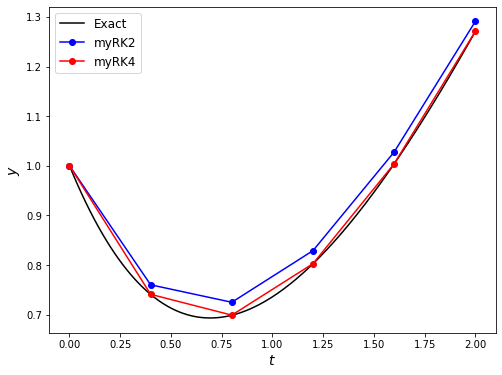

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def myrk4(f, tspan, y0, h):
    nsteps = int((tspan[1] - tspan[0]) / h)
    neq = len(y0)
    t = np.arange(nsteps + 1) * h
    y = np.zeros((nsteps + 1, neq))
    y[0,:] = y0
    for n in range(nsteps):
        k1 = f(t[n], y[n,:])
        k2 = f(t[n] + 1/5 * h, y[n,:] + 1/5 * h * k1)
        k3 = f(t[n] + 3/4 * h, y[n,:] + h * (-31/32 * k1 + 55/32 * k2))
        k4 = f(t[n] + h, y[n,:] + h * (9 * k1 - 120/11 * k2 + 32/11 * k3))
        y[n+1,:] = y[n,:] + h * (125/264 * k2 + 16/33 * k3 + 1/24 * k4)
        
    return t, y 


def f(t, y):
    return t - y


def exact(t):
    return t + 2 * np.exp(-t) - 1


# Define IVP
tspan = [0, 2]  # boundaries of the t domain
y0 = [1]        # solution at the lower boundary
h = 0.4         # step length

# Calculate the solutions to the IVP
t, y_myrk2 = myrk2(f, tspan, y0, h)
t, y_myrk4 = myrk4(f, tspan, y0, h)
    
# Plot solutions
t_exact = np.linspace(tspan[0], tspan[1], 200)
y_exact = exact(t_exact)
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(t_exact, y_exact, "k", label="Exact")
plt.plot(t, y_myrk2, "bo-", label="myRK2")
plt.plot(t, y_myrk4, "ro-", label="myRK4")
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [8]:
from myst_nb import glue
glue("ex2.10_plot", fig, display=False)

`````{admonition} Exercise 2.11
:class: note
:name: ex2.11

Use your functions `myrk2()` and `myrk4()` from [exercises 2.7](ex2.7) and [2.10](ex2.10) to solve the initial value problem from [exercise 2.6](ex2.6) using a range of step lengths starting at $h=0.4$ and halving each time until $h=0.025$. Plot the global truncation errors for the numerical solutions for $y(2)$ against $h$ on a loglog scale and estimate the order of the two methods.

````{dropdown} Solution

Python

```python
# Calculate solution for decreasing step lengths
h = [0.4, 0.2, 0.1, 0.05]
e = np.zeros((len(h), 2))
for i in range(len(h)):
    t, y = myrk2(f, tspan, y0, h[i])
    e[i,0] = abs(y_exact[-1] - y[-1,0])
    t, y = myrk4(f, tspan, y0, h[i])
    e[i,1] = abs(y_exact[-1] - y[-1,0])

# Plot errors
fig, ax = plt.subplots(figsize=(8, 6))
plt.loglog(h, e[:,0], "bo-", label="myRK2")
plt.loglog(h, e[:,1], "ro-", label="myRK4")
plt.xlabel(r"$\log(h)$", fontsize=16)
plt.ylabel(r"$\log(e_n)$", fontsize=16)
plt.legend(fontsize=12)
plt.show()

# Output table of errors
print("|   h   | myRK2 error | myRK4 error |")
print("|:-----:|:-----------:|:-----------:|")
for i in range(len(h)):
    print(f"| {h[i]:5.3f} |   {e[i,0]:0.2e}  |   {e[i,1]:0.2e}  |")
print()
    
# Estimate the order of the methods
order = (np.log(e[0,:]) - np.log(e[-1,:])) / (np.log(h[0]) - np.log(h[-1]))
print(f"myRK2 order: {order[0]:0.2f}\nmyRK4 order: {order[1]:0.2f}")
```

MATLAB

```
% Calculate solution for decreasing step lengths
h = [0.4, 0.2, 0.1, 0.05];
e = zeros(length(h), 2);
for i = 1 : length(h)
    [~, y] = myrk2(f, tspan, y0, h(i));
    e(i,1) = abs(y_exact(end) - y(end,1));
    [~, y] = myrk4(f, tspan, y0, h(i));
    e(i,2) = abs(y_exact(end) - y(end,1));
end

% Plot errors
loglog(h, e(:, 1), "b-o", LineWidth=2, MarkerFaceColor="b")
hold on
loglog(h, e(:, 2), "r-o", LineWidth=2, MarkerFaceColor="r")
hold off
xlabel("$\log(h)$", FontSize=16, Interpreter="latex")
ylabel("$\log(e_n)$", FontSize=16, Interpreter="latex")
legend("myRK2", "myRK4", Location="northwest", FontSize=12)

% Output table of errors
table = "|   h   | myRK2 error | myRK4 error |\n|:-----:|:-----------:|:-----------:|\n";
for i = 1 : length(h)
    table = append(table, sprintf("| %5.3f | %10.2e  | %10.2e  |\n", h(i), e(i, :)));
end
fprintf(table)
% Estimate the order of the methods
order = (log(e(1, :)) - log(e(end, :))) ./ (log(h(1)) - log(h(end)));
fprintf("myRK2 order: %1.2f\nmyRK4 order: %1.2f", order)
```

Output

```{glue:} ex2.11_plot
```

```
|   h   | myRK2 error | myRK4 error |
|:-----:|:-----------:|:-----------:|
| 0.400 |   2.01e-02  |   1.61e-04  |
| 0.200 |   4.23e-03  |   8.53e-06  |
| 0.100 |   9.74e-04  |   4.90e-07  |
| 0.050 |   2.34e-04  |   2.94e-08  |

myRK2 order: 2.14
myRK4 order: 4.14
```

````
`````

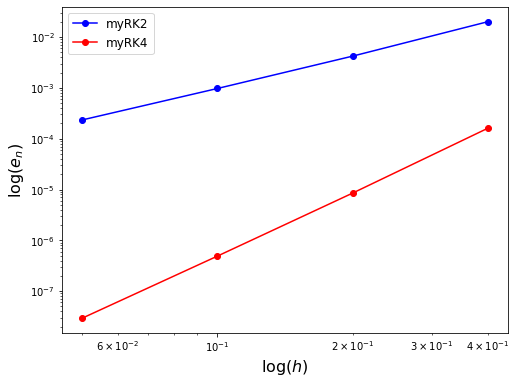

|   h   | myRK2 error | myRK4 error |
|:-----:|:-----------:|:-----------:|
| 0.400 |   2.01e-02  |   1.61e-04  |
| 0.200 |   4.23e-03  |   8.53e-06  |
| 0.100 |   9.74e-04  |   4.90e-07  |
| 0.050 |   2.34e-04  |   2.94e-08  |

myRK2 order: 2.14
myRK4 order: 4.14


In [9]:
# Calculate solution for decreasing step lengths
h = [0.4, 0.2, 0.1, 0.05]
e = np.zeros((len(h), 2))
for i in range(len(h)):
    t, y = myrk2(f, tspan, y0, h[i])
    e[i,0] = abs(y_exact[-1] - y[-1,0])
    t, y = myrk4(f, tspan, y0, h[i])
    e[i,1] = abs(y_exact[-1] - y[-1,0])

# Plot errors
fig, ax = plt.subplots(figsize=(8, 6))
plt.loglog(h, e[:,0], "bo-", label="myRK2")
plt.loglog(h, e[:,1], "ro-", label="myRK4")
plt.xlabel(r"$\log(h)$", fontsize=16)
plt.ylabel(r"$\log(e_n)$", fontsize=16)
plt.legend(fontsize=12)
plt.show()

# Output table of errors
print("|   h   | myRK2 error | myRK4 error |")
print("|:-----:|:-----------:|:-----------:|")
for i in range(len(h)):
    print(f"| {h[i]:5.3f} |   {e[i,0]:0.2e}  |   {e[i,1]:0.2e}  |")
print()
    
# Estimate the order of the methods
order = (np.log(e[0,:]) - np.log(e[-1,:])) / (np.log(h[0]) - np.log(h[-1]))
print(f"myRK2 order: {order[0]:0.2f}\nmyRK4 order: {order[1]:0.2f}")

In [10]:
glue("ex2.11_plot", fig, display=False)